In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import dask
# My imports
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))

import stats


Matplotlib created a temporary config/cache directory at /jobfs/114850327.gadi-pbs/matplotlib-hbkzmivw because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from dask.distributed import Client
client = Client()
client

 - State start
 - Found stale lock file and directory '/jobfs/114850327.gadi-pbs/dask-scratch-space/scheduler-e55poug7', purging
 -   Scheduler at:     tcp://127.0.0.1:39075
 -   dashboard at:         /proxy/8787/status
 - Registering Worker plugin shuffle
 -         Start Nanny at: 'tcp://127.0.0.1:36979'
 -         Start Nanny at: 'tcp://127.0.0.1:45087'
 -         Start Nanny at: 'tcp://127.0.0.1:40919'
 -         Start Nanny at: 'tcp://127.0.0.1:43049'
 -         Start Nanny at: 'tcp://127.0.0.1:38125'
 -         Start Nanny at: 'tcp://127.0.0.1:46733'
 -         Start Nanny at: 'tcp://127.0.0.1:43977'
 - Register worker <WorkerState 'tcp://127.0.0.1:34305', name: 4, status: init, memory: 0, processing: 0>
 - Starting worker compute stream, tcp://127.0.0.1:34305
 - Starting established connection to tcp://127.0.0.1:47260
 - Register worker <WorkerState 'tcp://127.0.0.1:35625', name: 5, status: init, memory: 0, processing: 0>
 - Starting worker compute stream, tcp://127.0.0.1:35625


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39075,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:41473,Total threads: 4
Dashboard: /proxy/43559/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:36979,


In [3]:
path = '/g/data/zv2/agcd/v2-0-1/precip/total/r005/01month'

In [8]:
def extract_precip(ds):
    return ds['precip']

In [13]:
ds = xr.open_mfdataset(os.path.join(path, '*.nc'), preprocess=extract_precip).precip

In [33]:
ds = ds.chunk({'time':-1, 'lat': int(691/10), 'lon':int(886/4)})

In [34]:
ds

<xarray.DataArray 'precip' (time: 1476, lat: 691, lon: 886)>
dask.array<rechunk-merge, shape=(1476, 691, 886), dtype=float32, chunksize=(1476, 69, 221), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16 1900-02-14T12:00:00 ... 2022-12-16
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Attributes:
    cell_methods:           time: sum time: sum (interval : 1 day)
    units:                  mm
    long_name:              Daily precipitation
    standard_name:          lwe_thickness_of_precipitation_amount
    frequency:              monthly
    start_offset:           -24
    grid_mapping:           crs
    coverage_content_type:  physicalMeasurement
    valid_range:            [     0. 100000.]

In [37]:
ds_sub_mean = ds - ds.mean(dim='time')

In [38]:
%%time
ds_sub_mean.compute();

CPU times: user 8.38 s, sys: 5.61 s, total: 14 s
Wall time: 21.2 s


<xarray.DataArray 'precip' (time: 1476, lat: 691, lon: 886)>
array([[[-180.1153   , -179.98412  , -179.819    , ...,  -23.766113 ,
          -23.923538 ,  -24.049438 ],
        [-179.78897  , -179.65701  , -179.49042  , ...,  -23.715836 ,
          -23.871887 ,  -23.99733  ],
        [-179.38365  , -179.24904  , -179.08318  , ...,  -23.650055 ,
          -23.809906 ,  -23.934174 ],
        ...,
        [ 155.8122   ,  156.0759   ,  156.40643  , ...,  138.66429  ,
          138.51678  ,  138.40097  ],
        [ 156.4649   ,  156.72736  ,  157.05688  , ...,  139.20978  ,
          139.06407  ,  138.94896  ],
        [ 156.98459  ,  157.24646  ,  157.57799  , ...,  139.64827  ,
          139.50116  ,  139.38455  ]],

       [[-193.95514  , -193.83275  , -193.68228  , ...,    4.898926 ,
            5.042282 ,    5.157593 ],
        [-193.58096  , -193.4578   , -193.30682  , ...,    5.028305 ,
            5.170105 ,    5.2878265],
        [-193.11217  , -192.9883   , -192.83904  , ...,    5.191742 ,
            5.335602 ,    5.4496155],
...
        [ -66.25226  ,  -66.25419  ,  -66.25764  , ..., -132.62575  ,
         -132.81622  , -132.96915  ],
        [ -66.41692  ,  -66.41913  ,  -66.42162  , ..., -132.98065  ,
         -133.16835  , -133.3196   ],
        [ -66.54667  ,  -66.55041  ,  -66.55287  , ..., -133.26189  ,
         -133.45001  , -133.6008   ]],

       [[-166.18756  , -166.05638  , -165.89224  , ...,  -39.132324 ,
          -39.424515 ,  -39.65686  ],
        [-165.88956  , -165.75565  , -165.591    , ...,  -39.12111  ,
          -39.412903 ,  -39.64479  ],
        [-165.51256  , -165.3799   , -165.21696  , ...,  -39.104156 ,
          -39.397797 ,  -39.63144  ],
        ...,
        [  63.525085 ,   63.61007  ,   63.71795  , ...,    4.544174 ,
            4.418152 ,    4.3160095],
        [  63.910225 ,   63.993958 ,   64.09986  , ...,    4.642395 ,
            4.51622  ,    4.415756 ],
        [  64.21407  ,   64.2992   ,   64.408066 , ...,    4.7224884,
            4.5949097,    4.493927 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16 1900-02-14T12:00:00 ... 2022-12-16
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2

In [39]:
def subtract_mean(ds):
    return ds - ds.mean(dim='time')

In [40]:
ds_sub_mean_2 = xr.map_blocks(subtract_mean, ds)

In [41]:
%%time
ds_sub_mean_2.compute();

CPU times: user 9.19 s, sys: 5.39 s, total: 14.6 s
Wall time: 21.6 s


<xarray.DataArray 'precip' (time: 1476, lat: 691, lon: 886)>
array([[[-180.1153   , -179.98412  , -179.819    , ...,  -23.766113 ,
          -23.923538 ,  -24.049438 ],
        [-179.78897  , -179.65701  , -179.49042  , ...,  -23.715836 ,
          -23.871887 ,  -23.99733  ],
        [-179.38365  , -179.24904  , -179.08318  , ...,  -23.650055 ,
          -23.809906 ,  -23.934174 ],
        ...,
        [ 155.8122   ,  156.0759   ,  156.40643  , ...,  138.66429  ,
          138.51678  ,  138.40097  ],
        [ 156.4649   ,  156.72736  ,  157.05688  , ...,  139.20978  ,
          139.06407  ,  138.94896  ],
        [ 156.98459  ,  157.24646  ,  157.57799  , ...,  139.64827  ,
          139.50116  ,  139.38455  ]],

       [[-193.95514  , -193.83275  , -193.68228  , ...,    4.898926 ,
            5.042282 ,    5.157593 ],
        [-193.58096  , -193.4578   , -193.30682  , ...,    5.028305 ,
            5.170105 ,    5.2878265],
        [-193.11217  , -192.9883   , -192.83904  , ...,    5.191742 ,
            5.335602 ,    5.4496155],
...
        [ -66.25226  ,  -66.25419  ,  -66.25764  , ..., -132.62575  ,
         -132.81622  , -132.96915  ],
        [ -66.41692  ,  -66.41913  ,  -66.42162  , ..., -132.98065  ,
         -133.16835  , -133.3196   ],
        [ -66.54667  ,  -66.55041  ,  -66.55287  , ..., -133.26189  ,
         -133.45001  , -133.6008   ]],

       [[-166.18756  , -166.05638  , -165.89224  , ...,  -39.132324 ,
          -39.424515 ,  -39.65686  ],
        [-165.88956  , -165.75565  , -165.591    , ...,  -39.12111  ,
          -39.412903 ,  -39.64479  ],
        [-165.51256  , -165.3799   , -165.21696  , ...,  -39.104156 ,
          -39.397797 ,  -39.63144  ],
        ...,
        [  63.525085 ,   63.61007  ,   63.71795  , ...,    4.544174 ,
            4.418152 ,    4.3160095],
        [  63.910225 ,   63.993958 ,   64.09986  , ...,    4.642395 ,
            4.51622  ,    4.415756 ],
        [  64.21407  ,   64.2992   ,   64.408066 , ...,    4.7224884,
            4.5949097,    4.493927 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * time     (time) datetime64[ns] 1900-01-16 1900-02-14T12:00:00 ... 2022-12-16

# Old Mock Data (broekn for some reason)

In [37]:
# Define dimensions
times = pd.date_range('2024-01-01', periods=1000)
latitudes = np.linspace(-90, 90, 1000)
longitudes = np.linspace(-180, 180, 500)

# Create coordinate arrays
coords = {'time': times, 'latitude': latitudes, 'longitude': longitudes}

# Create sample data
data = np.random.rand(len(times), len(latitudes), len(longitudes))

# Create xarray dataset
ds = xr.Dataset(
    {'data_var': (('time', 'latitude', 'longitude'), data)},
    coords=coords
).data_var

In [39]:
ds = ds.chunk({'time':-1, 'latitude':100, 'longitude':100})

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.472692 to fit


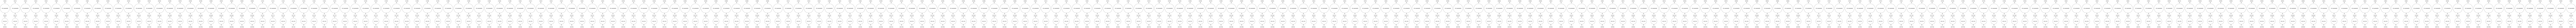

In [34]:
dask.visualize(ds_mean)

In [20]:
def subtract_mean(ds):
    return ds - ds.mean(dim='time')

In [21]:
(ds - ds.mean(dim='time')).compute()

 - Event loop was unresponsive in Nanny for 9.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 9.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 9.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 9.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 9.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Scheduler for 9.60s.  This is often caused by 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 3.73 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


 - Event loop was unresponsive in Nanny for 8.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 8.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 8.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 8.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 8.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Scheduler for 8.45s.  This is often caused by 

KeyboardInterrupt: 

 - Failed to deserialize
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/protocol/core.py", line 150, in loads
    return msgpack.loads(
  File "msgpack/_unpacker.pyx", line 194, in msgpack._cmsgpack.unpackb
ValueError: 4000012335 exceeds max_bin_len(2147483647)
 - Remove client Client-fdd79796-0693-11ef-a92a-00000798fe80
 - Close client connection: Client-fdd79796-0693-11ef-a92a-00000798fe80
 - Exception while handling op register-client
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/core.py", line 969, in _handle_comm
    result = await result
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/scheduler.py", line 5590, in add_client
    await self.handle_stream(comm=comm, extra={"client": client})
  File "/g/data/hh5/public/apps/miniconda3/envs/anal

In [14]:
xr.map_blocks(subtract_mean, ds).compute()

 - Event loop was unresponsive in Nanny for 8.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2024-04-24 14:47:40,749 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-04-24 14:47:40,749 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2024-04-24 14:47:40,750 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2024-04-24 14:47:40,750 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/compatibility.py", line 236, in asyncio_run
    return loop.run_until_complete(main)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/asyncio/base_events.py", line 636, in run_until_comple

 - Event loop was unresponsive in Nanny for 14.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 20.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 24.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 24.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 24.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Worker process 3502839 was killed by signal 2



KeyboardInterrupt



 - Worker process 3502859 was killed by signal 2
 - Worker process 3502851 was killed by signal 2
 - Worker process 3502862 was killed by signal 2
 - Worker process 3502847 was killed by signal 2
 - Worker process 3502856 was killed by signal 2
 - Worker process 3502843 was killed by signal 2
 - Connection to tcp://127.0.0.1:57940 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:39229', name: 0, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1713934082.1719615')
 - Connection to tcp://127.0.0.1:57928 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:41055', name: 5, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1713934082.1740294')
 - Connection to tcp://127.0.0.1:57944 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:43369', name: 1, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1713934082.1762178')
 - Connection to tcp://127.0.0.1:57956 has bee